# How much would somebody converted to veganism via Twitter reduce demand for animal products?
## To keep it simple, only looking at food rather than eg clothing

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import seaborn as sns

from IPython.core.display import display, HTML

prompted by Tweet:

In [3]:
display(HTML('<img src="images/tweet.png" , width=500/>'))

### 1. Average lifespan - average age of Twitter user = years of animal consumption saved

Average lifespan: presume the converted user is in US

In [4]:
display(HTML('<img src="https://api.backlinko.com/app/uploads/2021/05/twitter-users-by-country-768x584.webp" title="Twitter users by country" , width=500/>'))

Average age of Twitter user (presume US is representative)
https://www.statista.com/statistics/192703/age-distribution-of-users-on-twitter-in-the-united-states/

In [5]:
age_groups = {
'13-17': 6.6,
'18-24': 17.1,
'25-34': 38.5,
'35-49': 20.7,
'50+': 17.1}

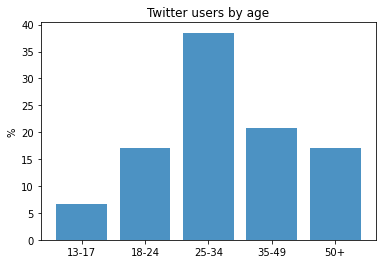

In [6]:
labels = [x for x in age_groups]
y_pos = np.arange(len(labels))
values = [age_groups[label] for label in labels]

ax = plt.bar(y_pos, values, align='center', alpha=0.8)
plt.xticks(y_pos, labels)
plt.ylabel('%')
plt.title('Twitter users by age')

plt.show()

In [7]:
# simplified: linear interpolation to get average age
before_median = age_groups['13-17'] + age_groups['18-24']
average_age_twt_user = (((50 - before_median) / age_groups['25-34']) * (34-24)) + 24
print(f"Average age of Twitter user: {average_age_twt_user:.0f} years old")

Average age of Twitter user: 31 years old


average life expectancy (remaining lifespan) of a 31-year old American is 47.5 years: 45 years for men, 50 years for women
https://www.health.ny.gov/health_care/medicaid/publications/docs/adm/06adm-5att8.pdf
![image.png](images/life_expectancy.png)

In [78]:
life_expectancy = 47.5

### consumption of beef, dairy, lamb, chicken, eggs

https://www.nationalchickencouncil.org/about-the-industry/statistics/per-capita-consumption-of-poultry-and-livestock-1965-to-estimated-2012-in-pounds/

fish from https://aboutseafood.com/about/top-ten-list-for-seafood-consumption/

In [113]:
labels = ['Beef', 'Pork', 'Chicken', 'Turkey', 'Fish & Shell-Fish']
values = [57., 49.9, 98.8, 15.3, 16.1]
animal_pounds_consumed = dict(zip(labels, values))

In [114]:
animal_pounds_consumed

{'Beef': 57.0,
 'Pork': 49.9,
 'Chicken': 98.8,
 'Turkey': 15.3,
 'Fish & Shell-Fish': 16.1}

In [88]:
#https://www.statista.com/statistics/183678/per-capita-consumption-of-eggs-in-the-us-since-2000/
eggs = 285 # units

In [134]:
# https://unitedegg.com/facts-stats/#:~:text=U.S.%20Egg%20Production%20and%20Hen%20Population&text=The%20U.S.%20had%20325%20million,produces%20296%20eggs%20per%20year.
eggs_per_chicken_per_year = 296

In [85]:
# https://www.idfa.org/news/u-s-dairy-consumption-beats-expectations-in-2020-and-continues-to-surge-upward-despite-disruption-caused-by-pandemic#:~:text=Last%20year%2C%20the%20average%20American,person%20over%20the%20previous%20year.
dairy = 655 # lbs

In [141]:
# https://www.statista.com/statistics/194935/quantity-of-milk-produced-per-cow-in-the-us-since-1999/
milk_per_cow_pa = 24265

In [138]:
dairy_life = 4 # years of milking before slaughter (assuming milk from 2 years, slaughtered at 6)

In [139]:
# assume (crudely) that 10% of beef is cull dairy, so as not to overcount
# https://academic.oup.com/jas/article-abstract/99/7/skab192/6298574
cull_dairy = .1

In [93]:
# https://www.telegraph.co.uk/news/earth/earthnews/3353985/One-third-of-fish-caught-worldwide-used-as-animal-feed.html#:~:text=One%2Dthird%20of%20fish%20caught,directly%20nourish%20humans%2C%20scientists%20claim.
fish_animal_feed = 1/3

In [169]:
# https://aboutseafood.com/about/top-ten-list-for-seafood-consumption/
fish_consumed = {
    'shrimp':4.6,
    'salmon':2.55,
    'tuna':2.1,
}
total_fish_consumed = 16.1

In [170]:
fish_consumed['other'] = (1 - (sum(fish_consumed.values()) / total_fish_consumed)) * total_fish_consumed

In [171]:
sum(fish_consumed.values()) == total_fish_consumed

True

In [173]:
fish_weights_lbs = {
    'shrimp': (1/45), # https://stripedspatula.com/shrimp-sizes/
    'salmon': 10, # https://www.fws.gov/fisheries/freshwater-fish-of-america/atlantic_salmon.html
    'tuna': 200, # https://www.mass.gov/service-details/learn-about-atlantic-bluefin-tuna
    'other': 2, # guess, given makeup
}

In [174]:
# calculated weighted average weight fish & shellfish
fish_consumed_per_year = dict()
for fish, weight in fish_consumed.items():
    fish_consumed_per_year[fish] = weight / fish_weights_lbs[fish]

In [185]:
fish_consumed_per_year

{'shrimp': 206.99999999999997,
 'salmon': 0.255,
 'tuna': 0.0105,
 'other': 3.425000000000001}

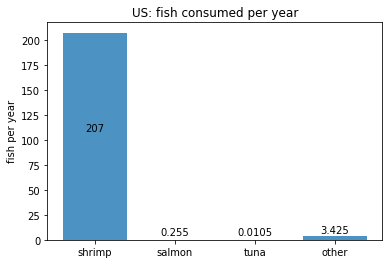

In [195]:
labels = fish_consumed_per_year.keys()
y_pos = np.arange(len(labels))
values = [fish_consumed_per_year[label] for label in labels]

ax = plt.bar(y_pos, values, align='center', alpha=0.8)
plt.bar_label(ax, label_type = 'center', padding=8)
plt.xticks(y_pos, labels)
plt.ylabel('fish per year')
plt.title('US: fish consumed per year')

plt.show()

In [196]:
total_fish_and_shellfish_consumed_per_year = sum(fish_consumed_per_year.values())

In [197]:
total_fish_and_shellfish_consumed_per_year

210.6905

In [198]:
# carcass weights deboned and trimmed
carcass_weights = {
    'Beef': 500, # https://extension.tennessee.edu/publications/documents/pb1822.pdf
    'Pork': 140, # https://www.gourmetsleuth.com/articles/detail/pork-cut-yield-per-hog
    'Chicken': 3, # http://jaysonlusk.com/blog/2021/6/17/beef-chicken-and-carbon - assume 3lbs meat from 4.5lbs carcass
    'Turkey': 8, # https://www.forbes.com/sites/bethhoffman/2012/11/16/stop-buy-a-smaller-turkey/
    #'Fish & Shell-Fish':
    
}

In [221]:
cows_saved_per_year = animal_pounds_consumed['Beef'] / carcass_weights['Beef']
cows_saved = cows_saved_per_year * life_expectancy

# this is from beef, now calculated dairy
dairy_cows_saved = dairy / milk_per_cow_pa * life_expectancy

total_cows_saved = cows_saved + dairy_cows_saved
total_cows_saved

6.697196579435401

In [222]:
pigs_saved_per_year = animal_pounds_consumed['Pork'] / carcass_weights['Pork']
pigs_saved = pigs_saved_per_year * life_expectancy
pigs_saved

16.930357142857144

In [227]:
chickens_saved_per_year = animal_pounds_consumed['Chicken'] / carcass_weights['Chicken']
chickens_saved = chickens_saved_per_year * life_expectancy

# add layers saved
layers_saved_per_year = eggs / eggs_per_chicken_per_year
layers_saved = layers_saved_per_year * life_expectancy

chickens_saved = chickens_saved + layers_saved
chickens_saved

1610.0681306306305

In [228]:
total_fish_and_shellfish_saved = total_fish_and_shellfish_consumed_per_year * life_expectancy
total_fish_and_shellfish_saved

10007.79875

In [219]:
for fish, pa in fish_consumed_per_year.items():
    print(f"{fish}: {(pa * life_expectancy):.1f}")

shrimp: 9832.5
salmon: 12.1
tuna: 0.5
other: 162.7
